In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf 
import warnings
warnings.filterwarnings('ignore')

In [121]:
print(tf.__version__)

1.15.0


In [0]:
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
import os
from keras.utils import to_categorical

In [0]:
batch_size = 32
num_classes = 10
epochs = 1

In [0]:
# Loads the CIFAR dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [125]:
# Display our data shape/dimensions
print('x_train shape:',x_train.shape)
print('Train Samples:',x_train.shape[0])
print('Train Samples:',x_test.shape[0])

x_train shape: (50000, 32, 32, 3)
Train Samples: 50000
Train Samples: 10000


In [0]:
# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

In [127]:
# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Number of classes:',y_test.shape)

Number of classes: (10000, 10)


In [128]:
x_train.shape[1:]

(32, 32, 3)

In [0]:
from  tensorflow.keras.optimizers import RMSprop

In [133]:
model = Sequential()
model.add(Conv2D(
    32,
    (3,3),
    padding = 'same',
    input_shape = x_train.shape[1:],
    activation='relu'
))
model.add(Conv2D(
    32,
    (3,3),
    activation = 'relu'
))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(
    64,
    (3,3),
    padding = 'same',
    activation='relu'
))
model.add(Conv2D(
    64,
    (3,3),
    activation = 'relu'
))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(learning_rate=0.0001, rho=0.6),
    metrics = ['accuracy']
)
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 64)        

In [134]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test),
          shuffle=True)


# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 253us/sample - loss: 1.8259 - acc: 0.3282 - val_loss: 1.5372 - val_acc: 0.4415
Epoch 2/15
50000/50000 [==============================] - 12s 240us/sample - loss: 1.5094 - acc: 0.4484 - val_loss: 1.3849 - val_acc: 0.4927
Epoch 3/15
50000/50000 [==============================] - 12s 240us/sample - loss: 1.3750 - acc: 0.5059 - val_loss: 1.2448 - val_acc: 0.5558
Epoch 4/15
50000/50000 [==============================] - 12s 241us/sample - loss: 1.2816 - acc: 0.5437 - val_loss: 1.1777 - val_acc: 0.5813
Epoch 5/15
50000/50000 [==============================] - 12s 238us/sample - loss: 1.2121 - acc: 0.5694 - val_loss: 1.1171 - val_acc: 0.6053
Epoch 6/15
50000/50000 [==============================] - 12s 242us/sample - loss: 1.1558 - acc: 0.5917 - val_loss: 1.0768 - val_acc: 0.6204
Epoch 7/15
50000/50000 [==============================] - 12s 243us/sample - loss: 1.1106 - acc: 0.6101 

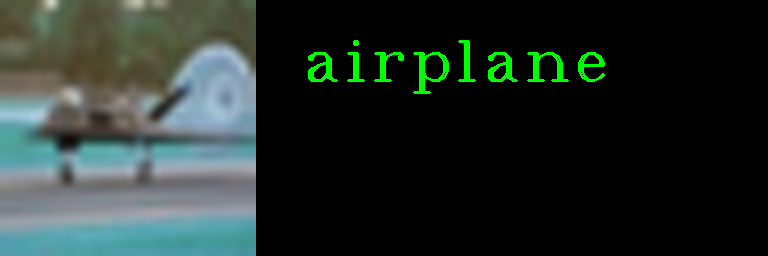

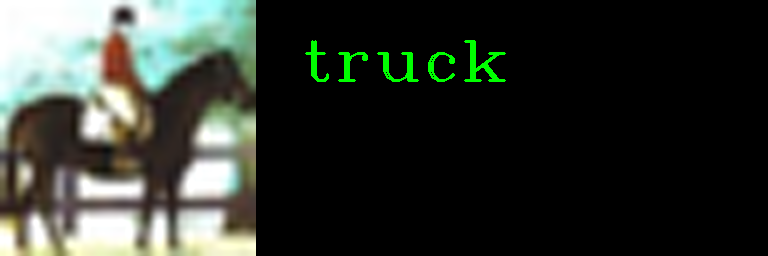

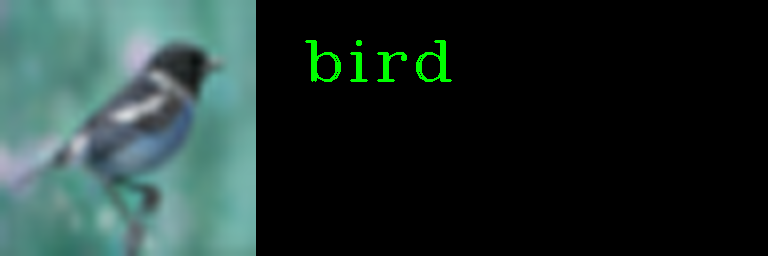

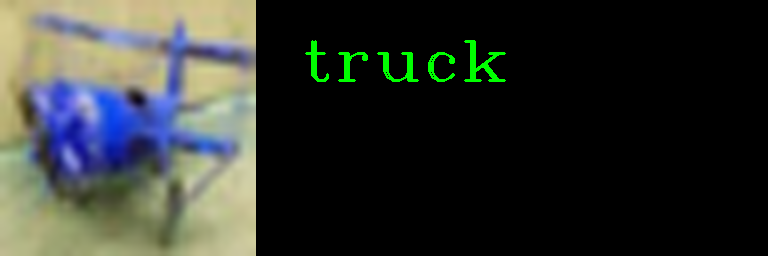

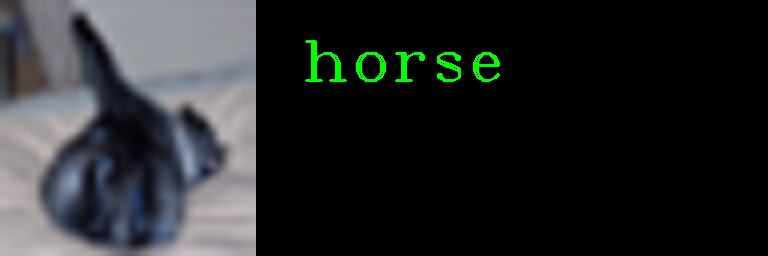

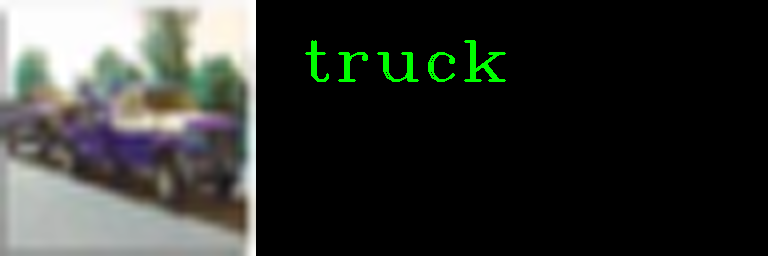

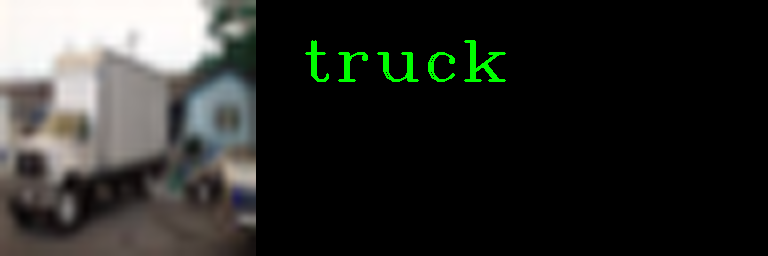

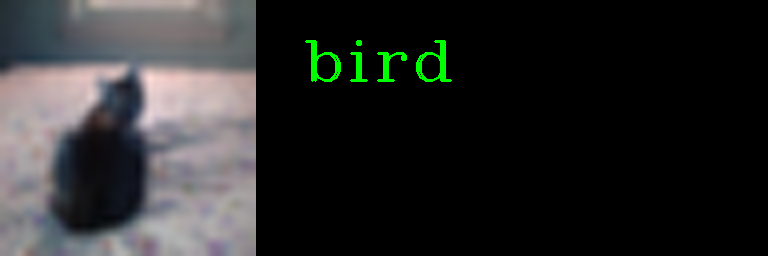

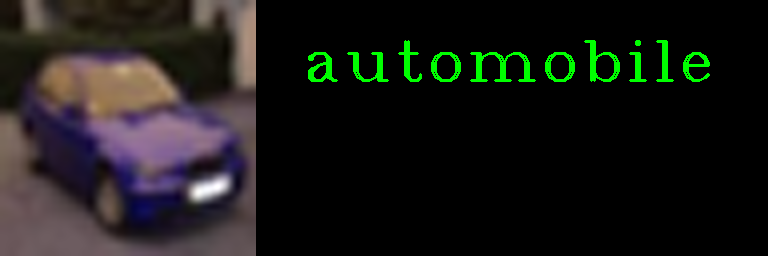

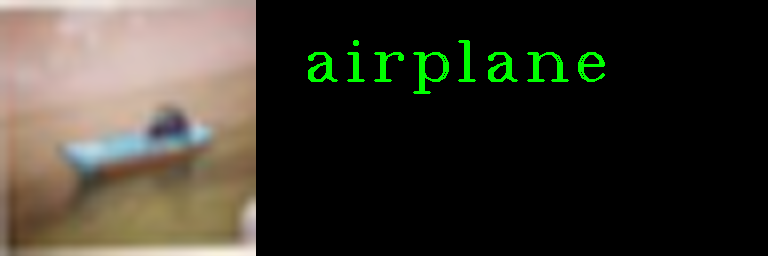

In [137]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

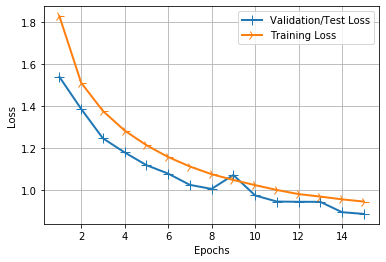

In [138]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [0]:
from google.colab.patches import cv2_imshow

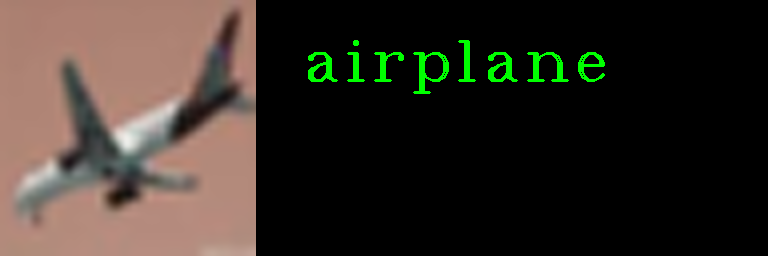

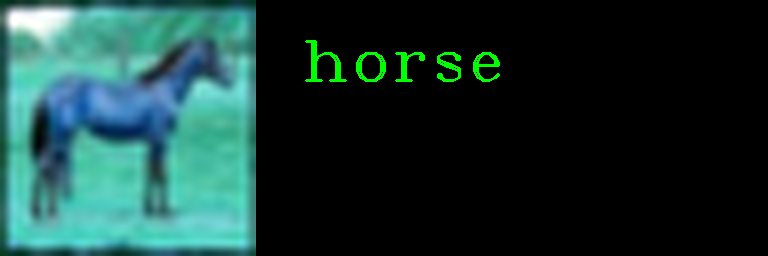

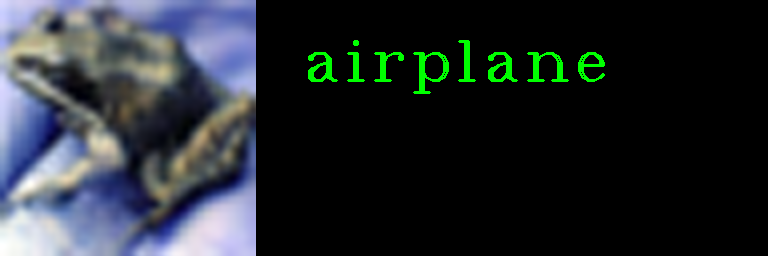

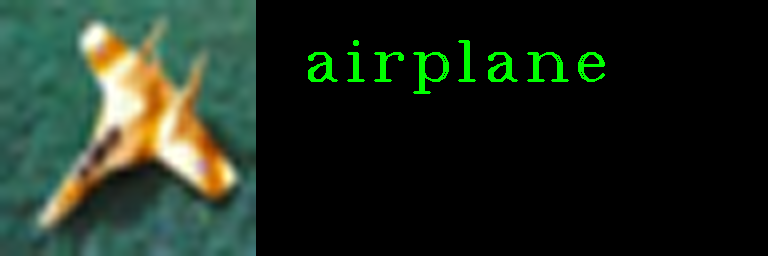

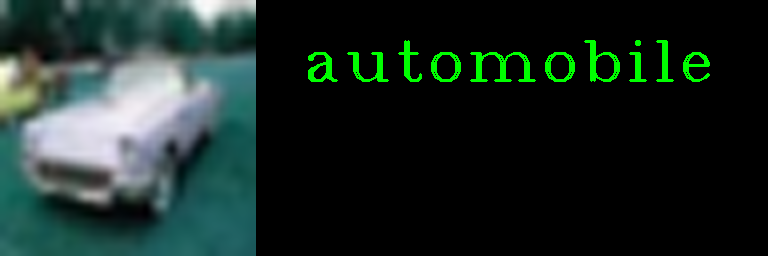

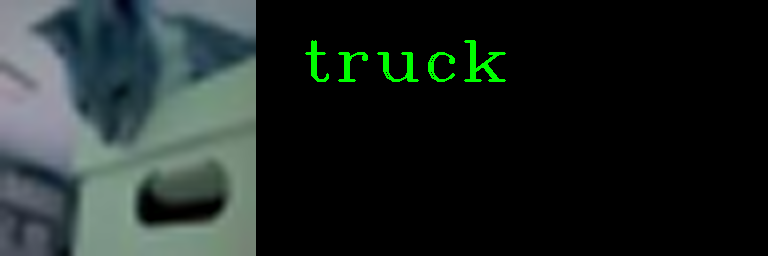

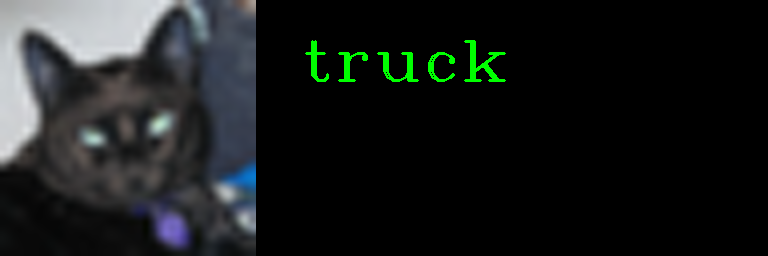

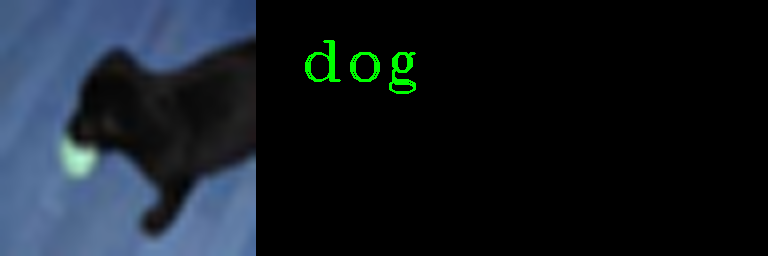

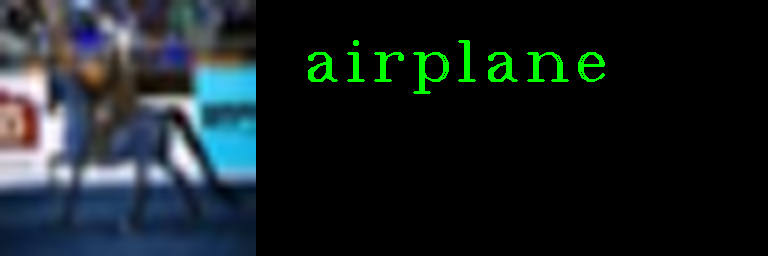

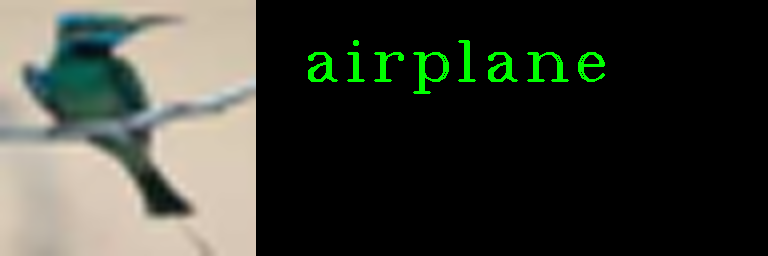

In [94]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('/content/gdrive/My Drive/DeepLearningCV/Trained Models/cifar_simple_cnn.h5')
color = True 
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2_imshow(expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,img_row, img_height, img_depth) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
              
    draw_test("Prediction", res, imageL, scale, img_row, img_height) 
    cv2.waitKey(0)

cv2.destroyAllWindows()